# Part A: Logistic Regression

## Learning task 1

1. Build  a  classification  model  `(LR1)`  using  Logistic  Regression.  
2. What  happens  to  testing accuracy when you vary the  decision  probability threshold  from  0.5 to 0.3, 0.4,  0.6 and  0.7.

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append("..")
from preprocessor import Preprocessor
from Models.LogisticRegression import LogReg
import warnings 
import matplotlib.pyplot as plt
warnings.filterwarnings(action="ignore")

In [2]:
# Variables (hyperparamters) as defined in question

thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
learning_rates = [1e-2, 1e-3, 1e-4]
descents = ["batch", "mini-batch", "stochastic"]

# Creating a parameter grid

grid = {}
for threshold in thresholds:
    for learning_rate in learning_rates:
        for descent in descents:
            grid[(threshold, learning_rate, descent)]: tuple[float, float] = tuple()

# creating a dataframe to store the results

results = pd.DataFrame(columns=["threshold", "learning_rate", "descent", "mean_accuracy", "std_accuracy"])

In [3]:
dataset = pd.read_csv("../dataset.csv")
dataset.drop(columns = ["id"], inplace=True)

In [4]:
preprocessor_1 = Preprocessor(dataset, "diagnosis")
splits = preprocessor_1.preprocess(drop_na=True, standardize=False, labels=[0, 1], n_splits=2)

In [5]:
def create_plot(train_losses, test_losses, title):
    plt.figure()
    plt.suptitle("Losses")
    plt.plot(train_losses[::20], label="Train")
    plt.plot(test_losses[::20], label="Test")
    plt.xlabel("Epochs * 20")
    plt.ylabel("Loss")
    plt.title(title)
    plt.legend()
    plt.show()
    

Learning Task1: No Feature Engineering


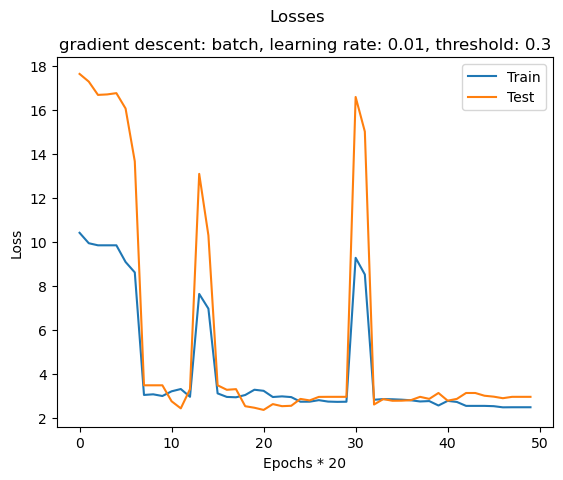

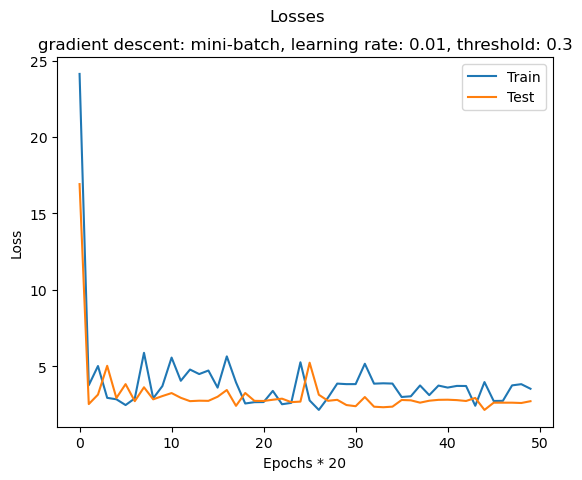

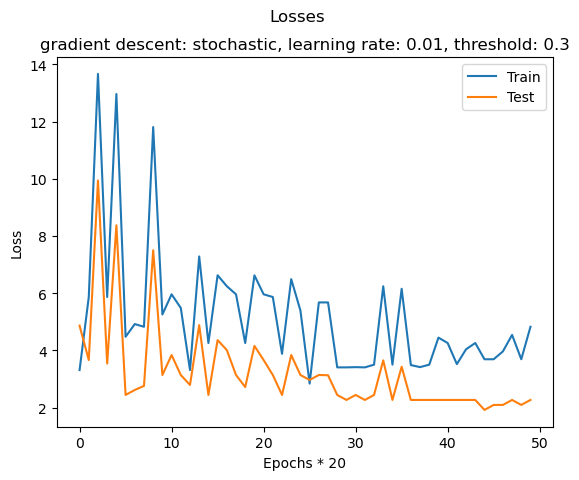

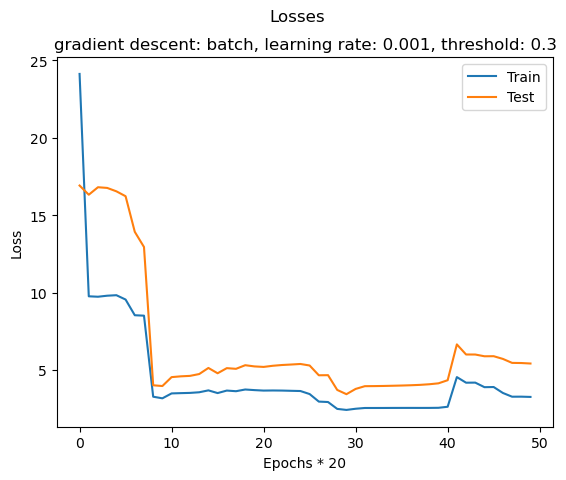

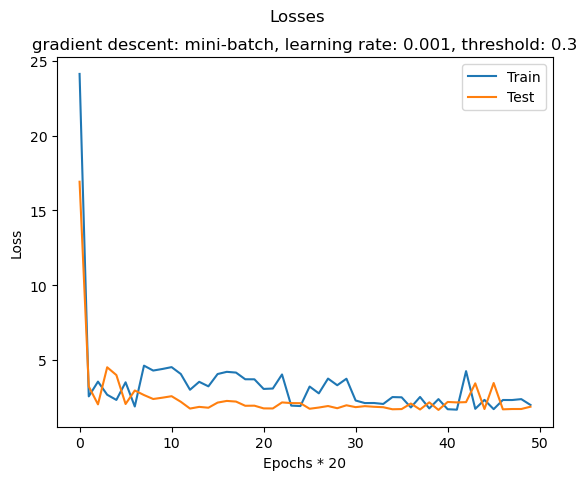

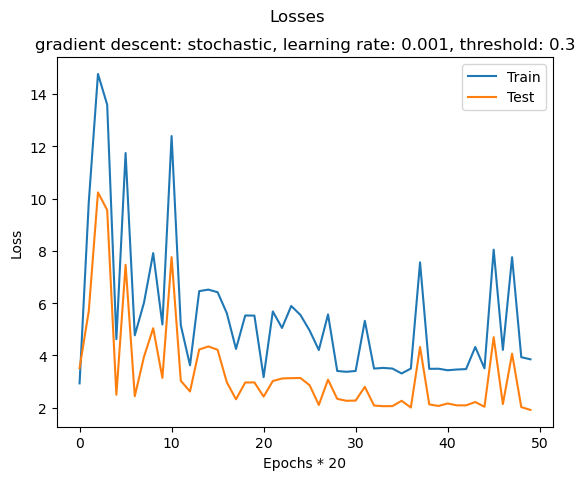

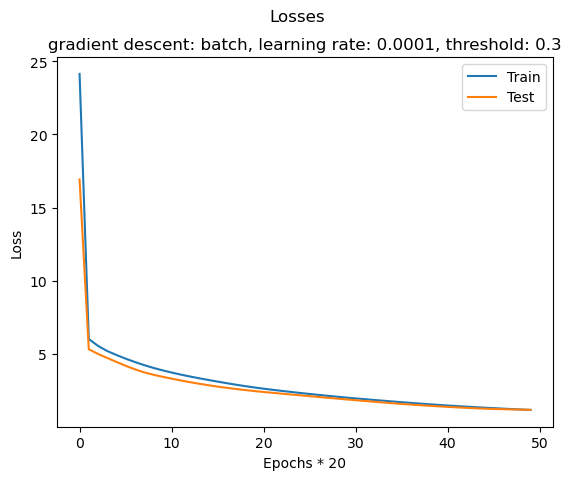

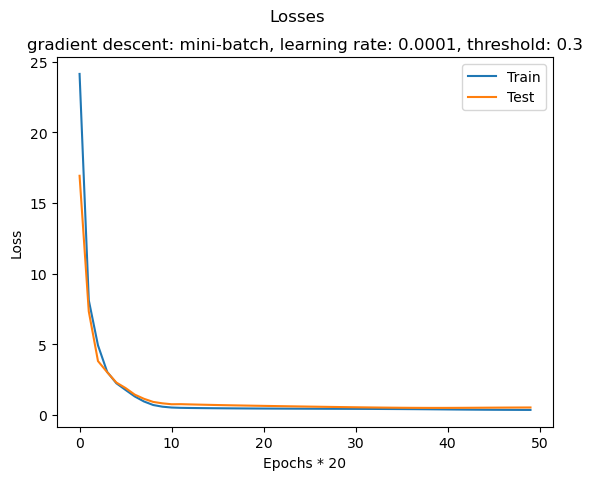

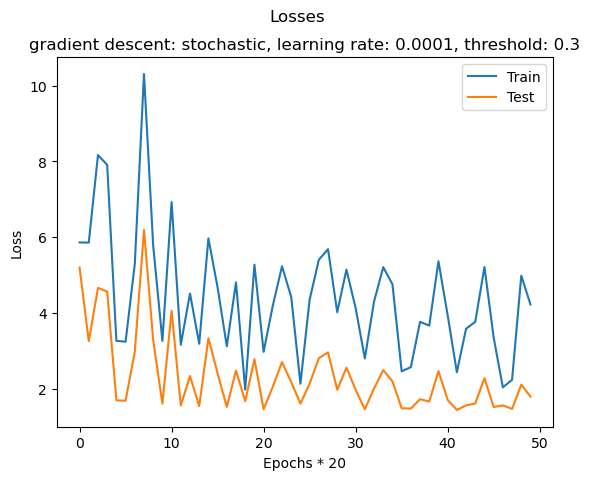

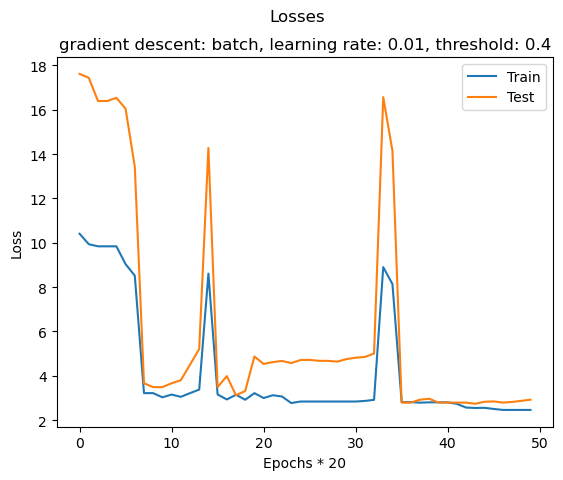

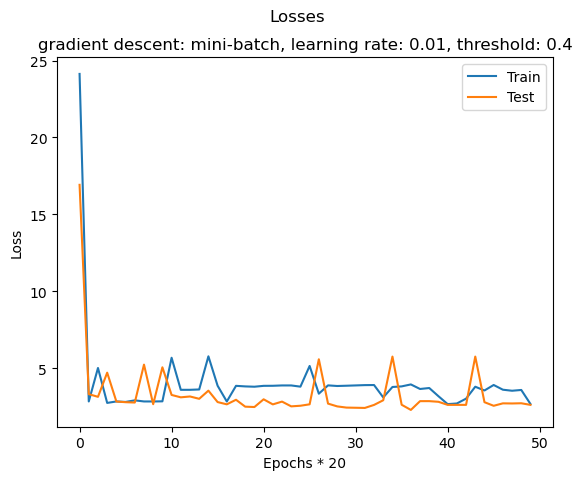

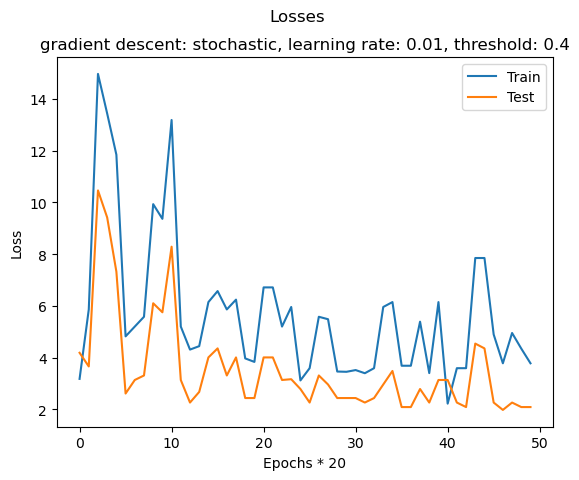

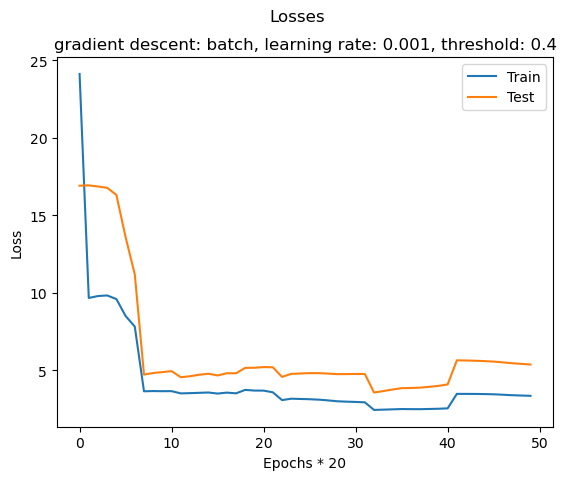

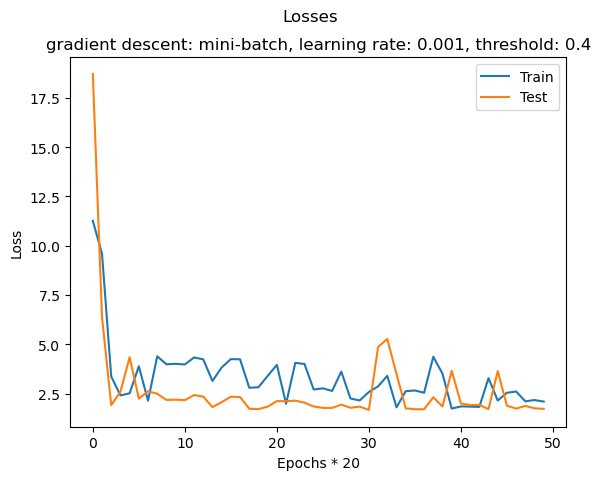

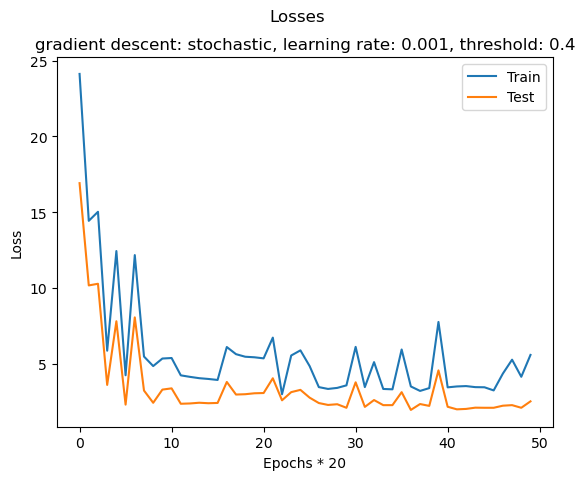

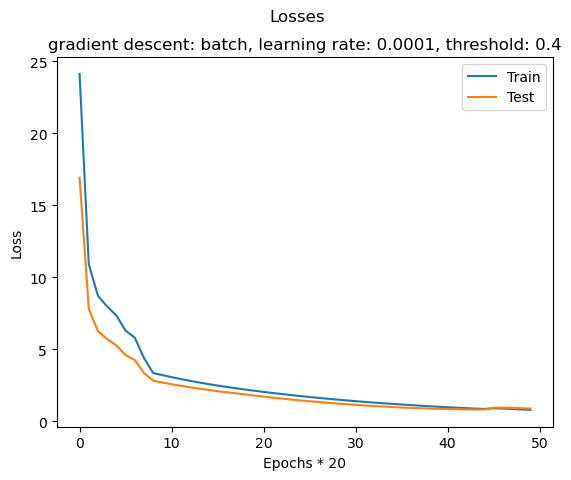

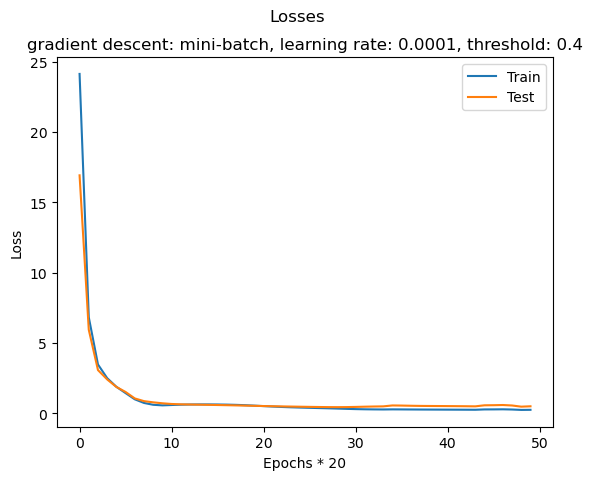

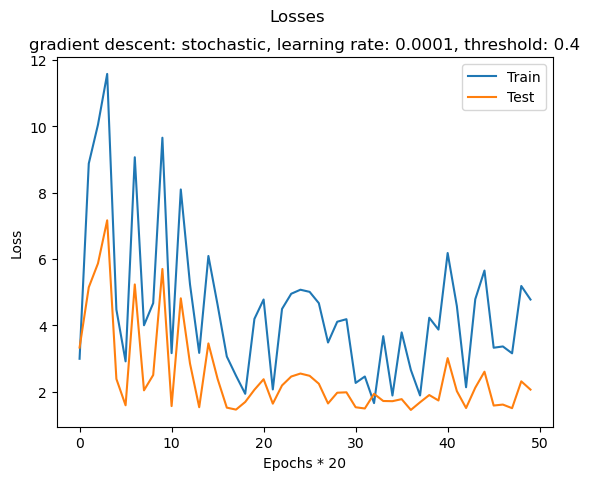

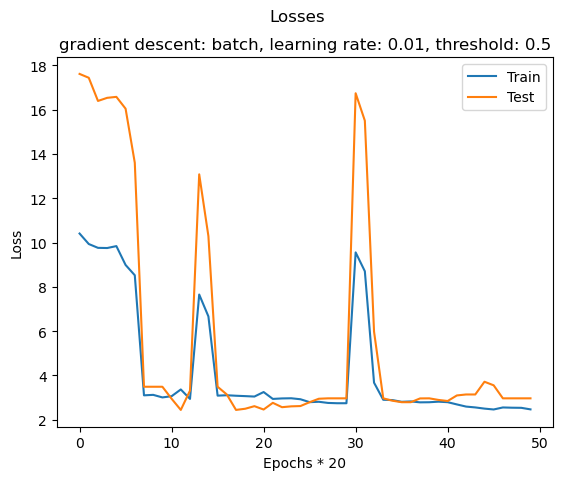

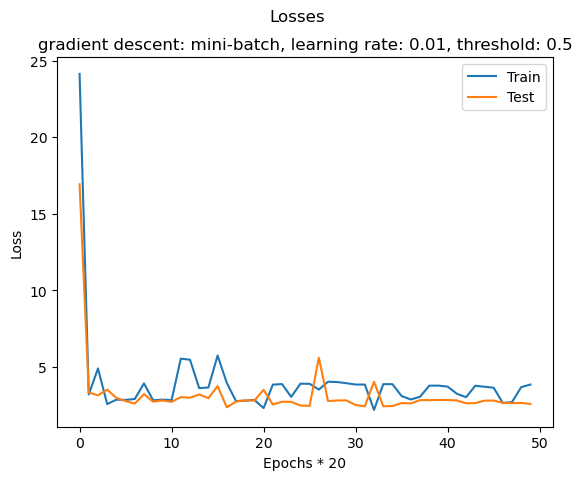

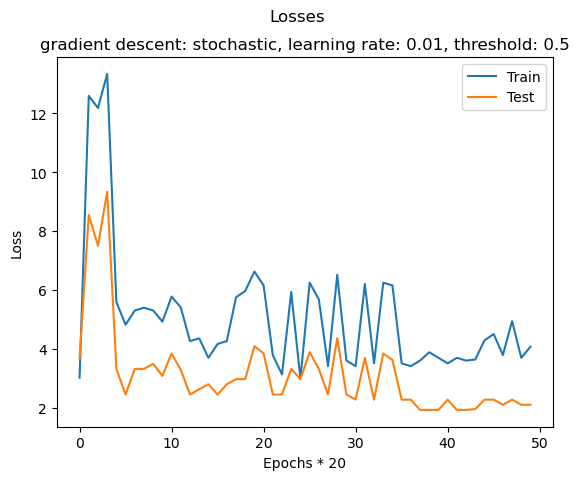

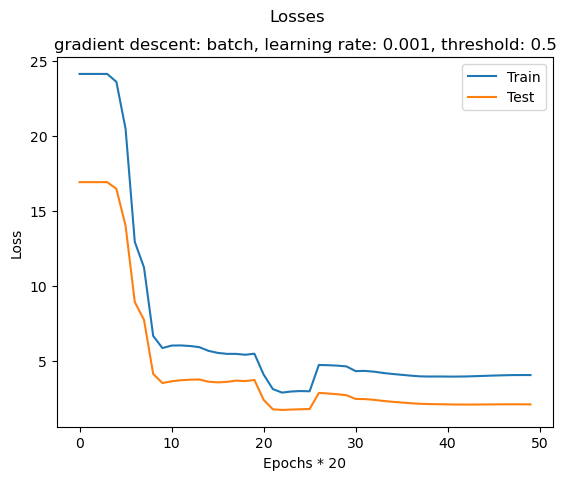

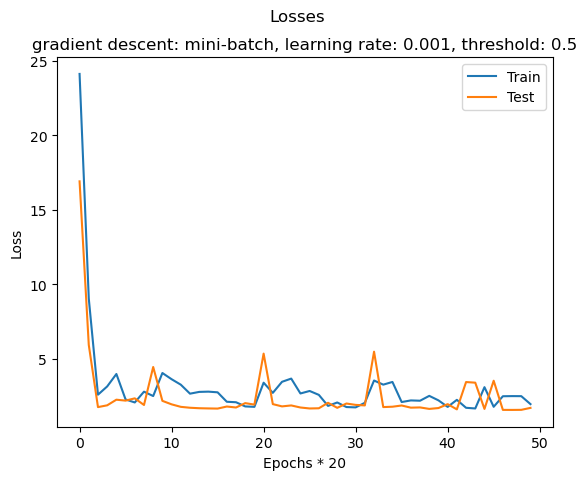

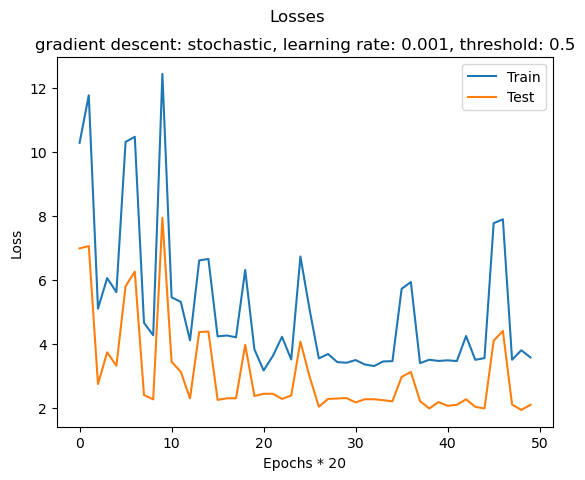

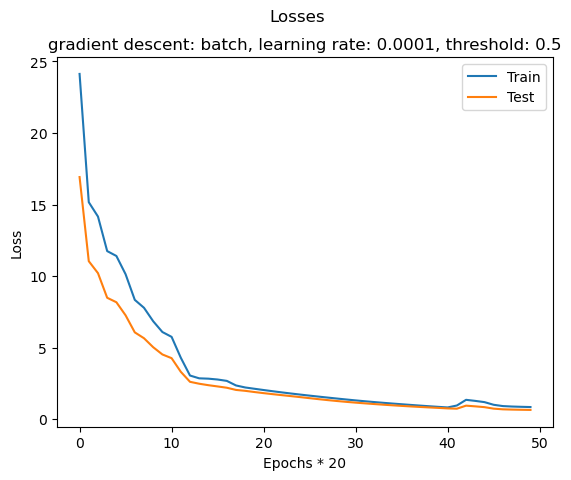

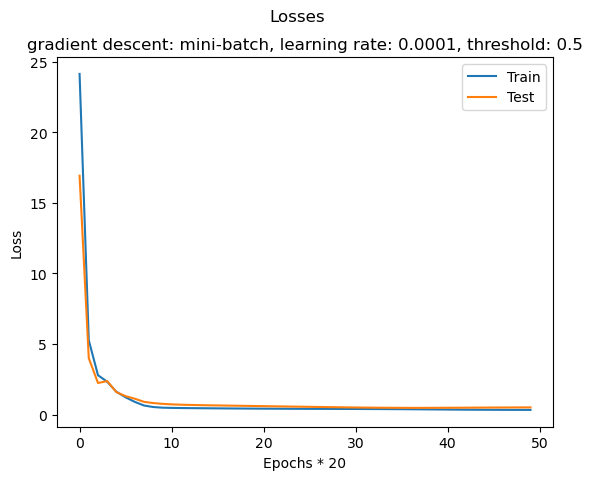

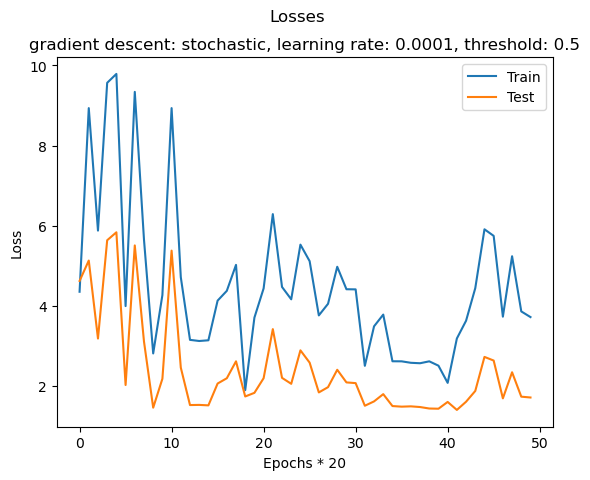

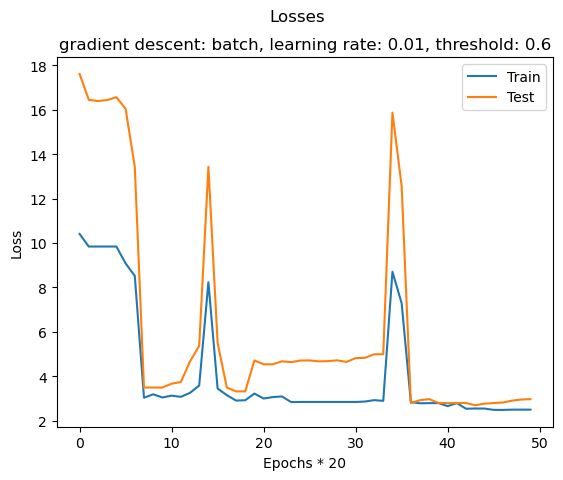

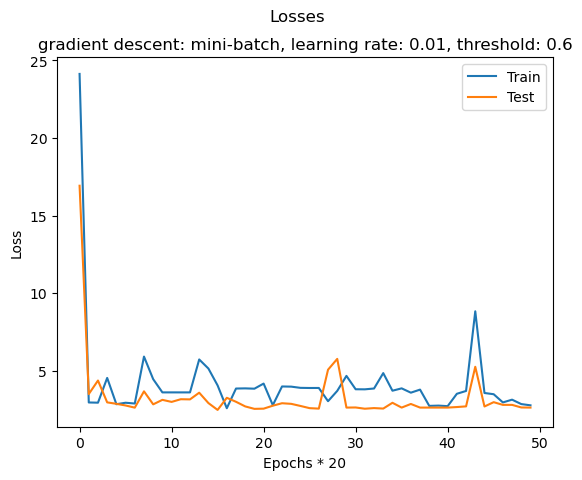

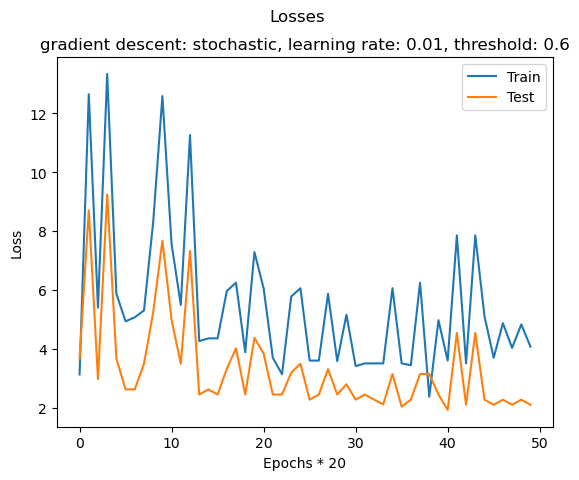

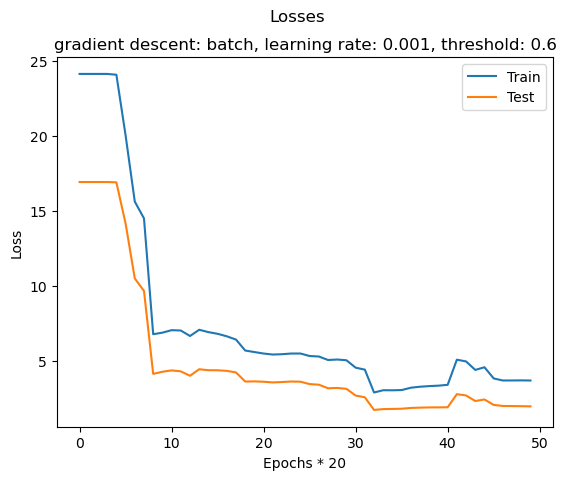

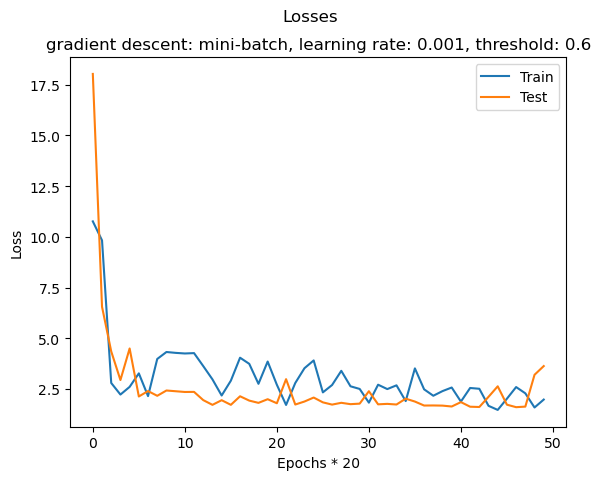

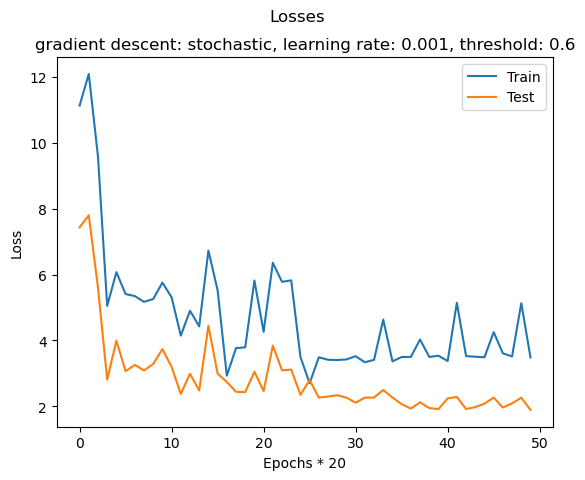

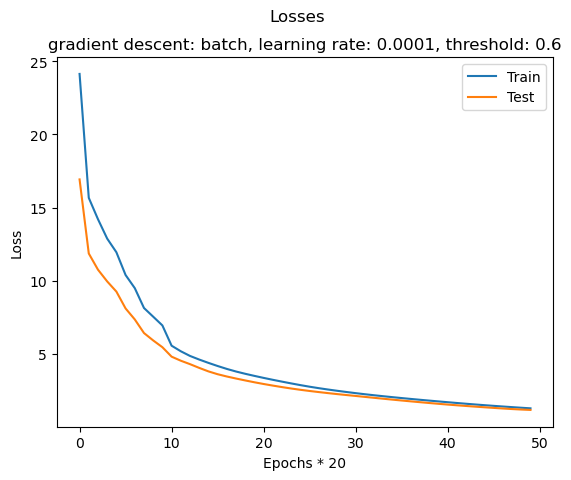

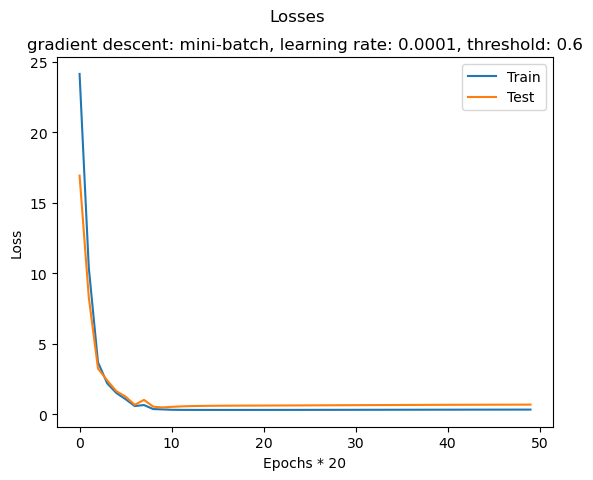

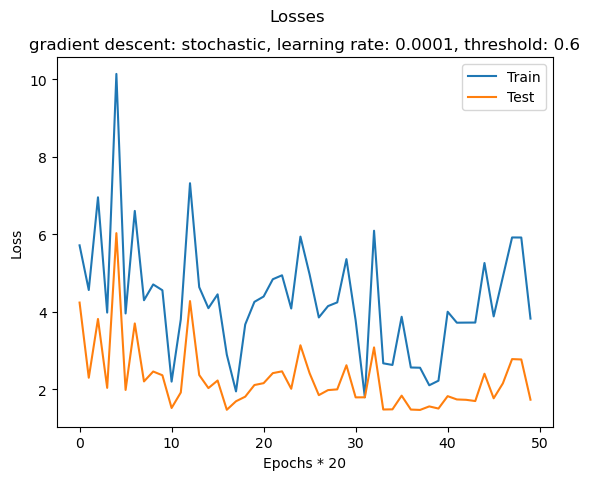

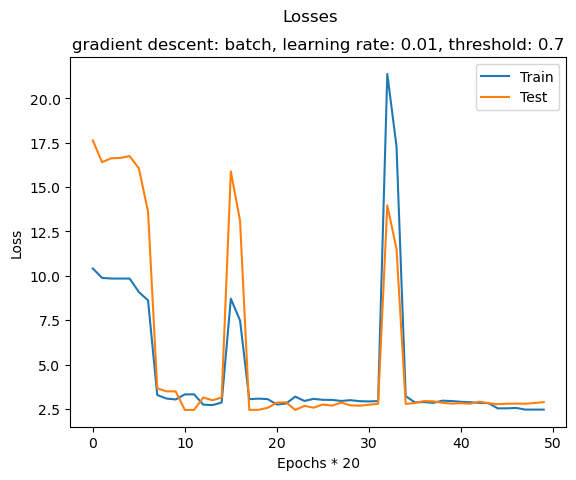

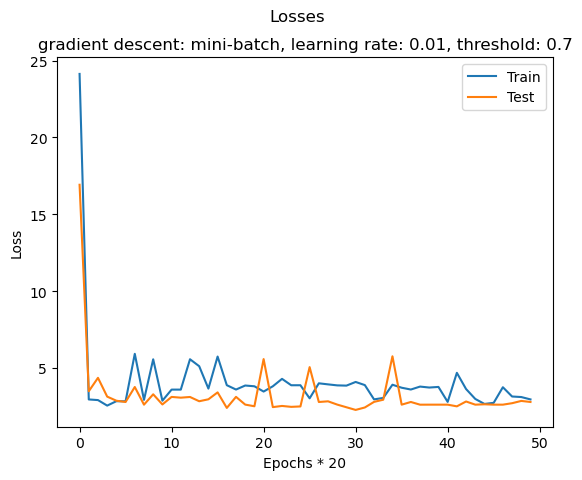

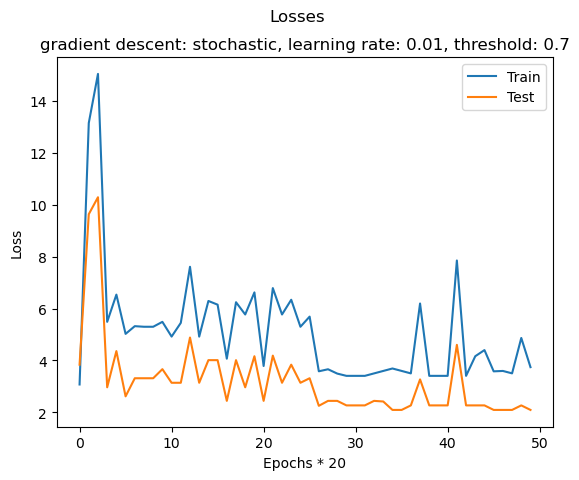

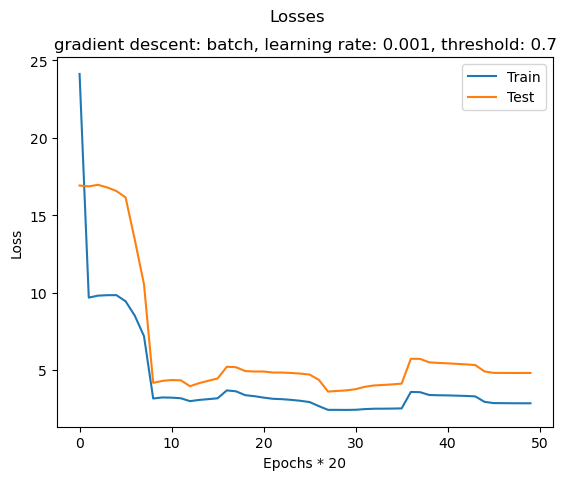

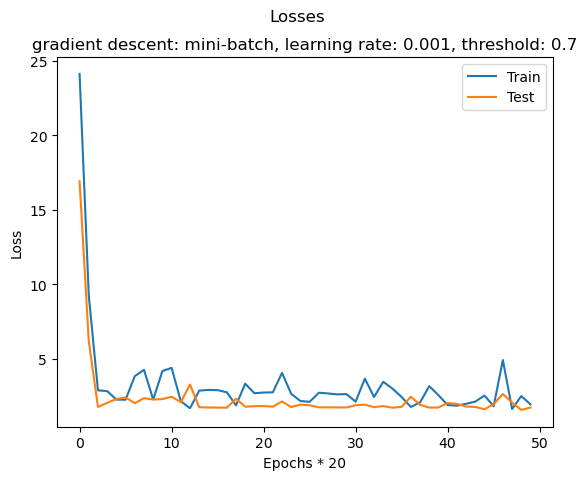

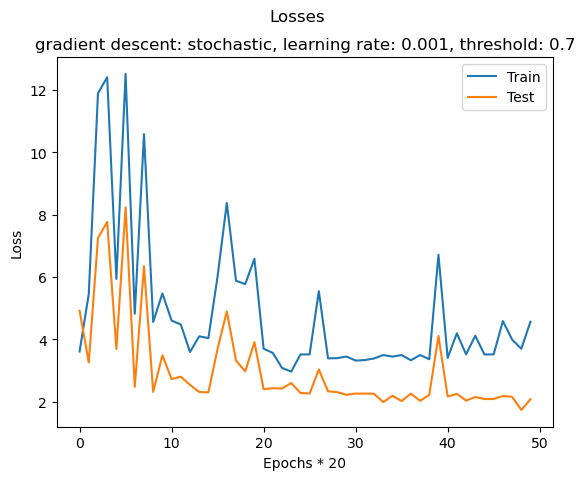

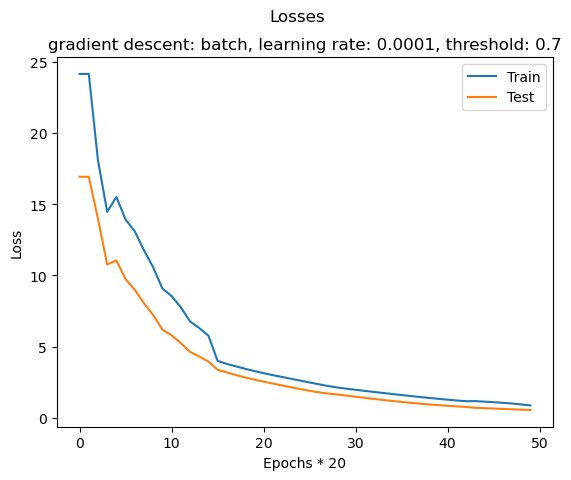

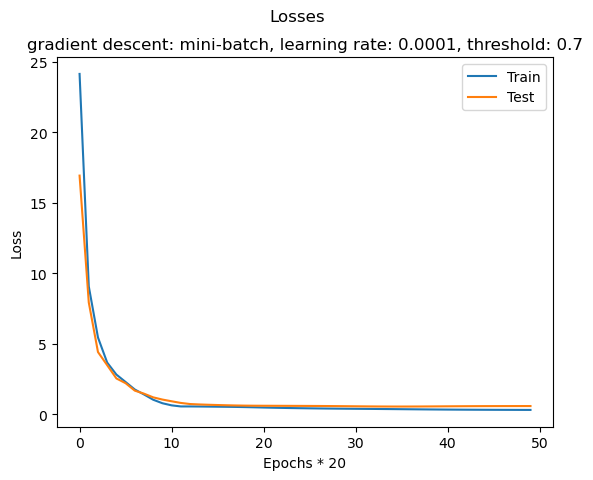

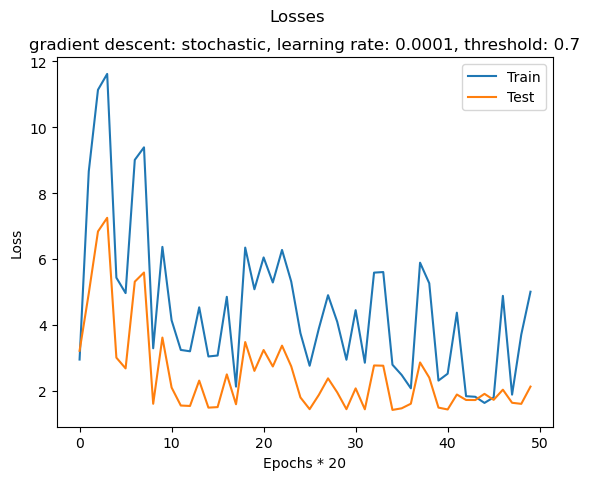

In [6]:
results_lr1 = results.copy()
print("Learning Task1: No Feature Engineering")
for key in grid.keys():
    threshold, learning_rate, descent = key
    accuracies: list[float] = []
    for split in splits:

        train, test = split
        X_train, y_train = train.drop(columns=["diagnosis"]).to_numpy(dtype=np.float64), train["diagnosis"].to_numpy(dtype=np.float64)
        X_test, y_test = test.drop(columns=["diagnosis"]).to_numpy(dtype=np.float64), test["diagnosis"].to_numpy(dtype=np.float64)
        logreg_1 = LogReg(threshold=threshold)
        train_losses, test_losses = logreg_1.fit(X_train, y_train, X_test, y_test, lr = learning_rate, descent=descent, epochs=1000)
        
        y_pred = logreg_1.predict(X_test)
        tp, tn, fp, fn = logreg_1.score(X_test, y_test)
        accuracies.append((tp + tn) / (tp + tn + fp + fn))
    result_dict = {
        "threshold": threshold,
        "learning_rate": learning_rate,
        "descent": descent,
        "mean_accuracy": np.round((np.mean(accuracies)*100), 2),
        "std_accuracy": np.round((np.std(accuracies)*100), 2)
    }
    create_plot(train_losses, test_losses, f"gradient descent: {descent}, learning rate: {learning_rate}, threshold: {threshold}")
    result =  pd.DataFrame(result_dict, index=[0])
    results_lr1 = pd.concat([results_lr1, result], ignore_index=True)

In [7]:
results_lr1

,threshold,learning_rate,descent,mean_accuracy,std_accuracy
0,0.3,0.0100,batch,90.66,0.25
1,0.3,0.0100,mini-batch,88.89,2.53
2,0.3,0.0100,stochastic,92.68,0.76
3,0.3,0.0010,batch,87.37,4.04
4,0.3,0.0010,mini-batch,92.17,0.25
5,0.3,0.0010,stochastic,92.93,1.01
6,0.3,0.0001,batch,85.86,2.02
7,0.3,0.0001,mini-batch,89.65,1.77
8,0.3,0.0001,stochastic,88.64,0.25
9,0.4,0.0100,batch,91.16,0.25


## Learning task 2

1. Perform:
    1. Feature engineering task 1: imputing missing values
    2. Feature engineering task 2: normalization/stanardization

2. Build a  classification  model  `(LR2)`  using  Logistic  Regression.

3. What  happens  to  testing accuracy when you vary the  decision  probability threshold  from  0.5 to 0.3, 0.4,  0.6 and  0.7.

In [8]:
preprocessor_2 = Preprocessor(dataset, "diagnosis")
splits = preprocessor_2.preprocess(drop_na=False, standardize=True, labels=[0, 1], n_splits=10)

Learning Task2: Feature Engineering


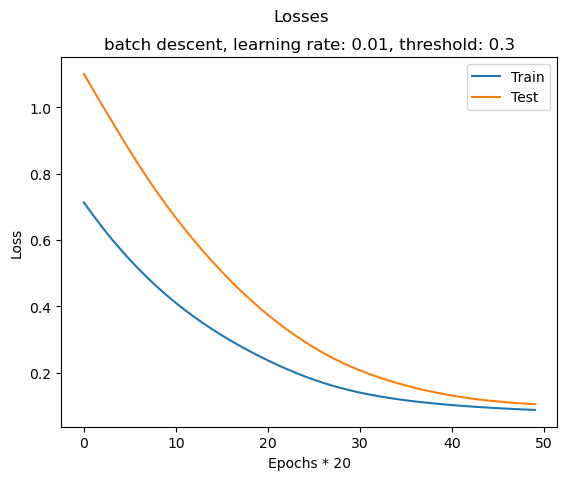

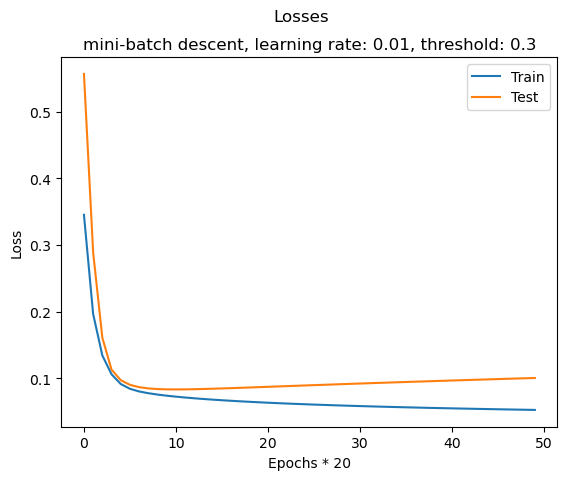

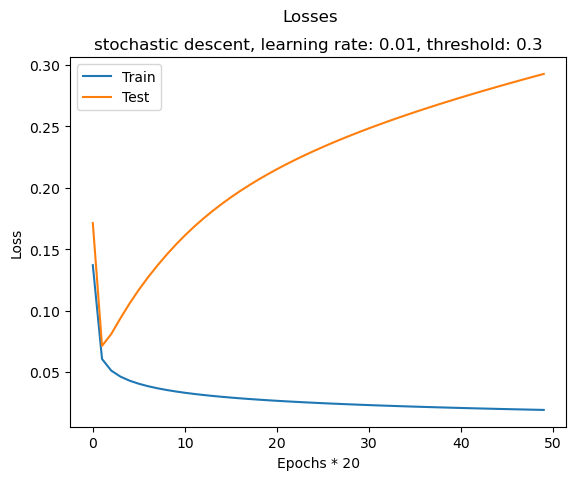

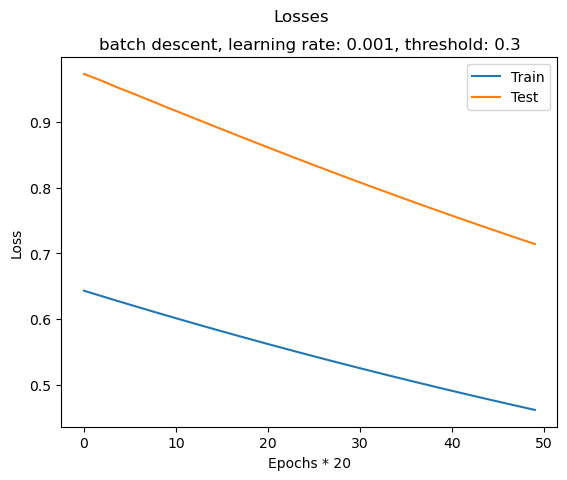

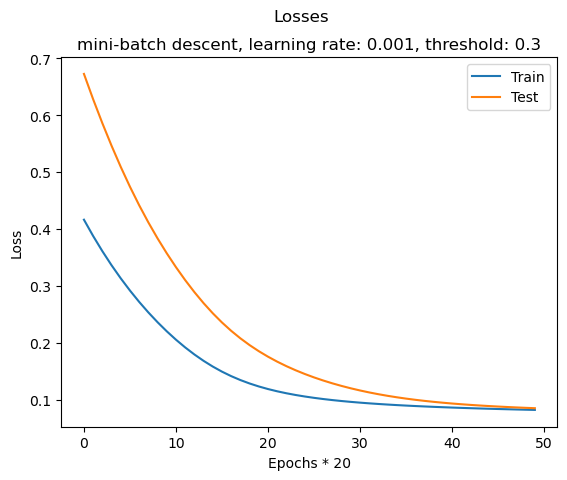

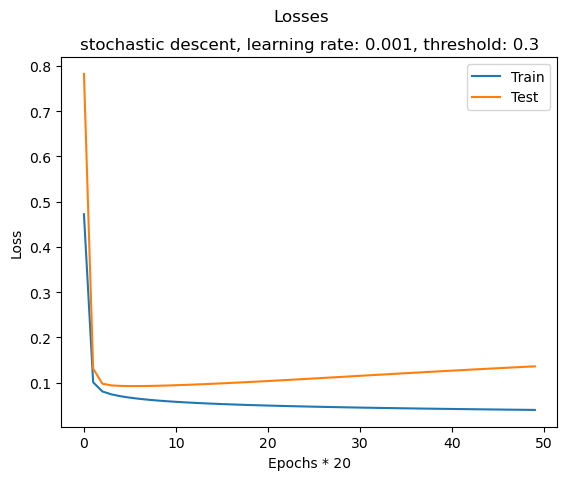

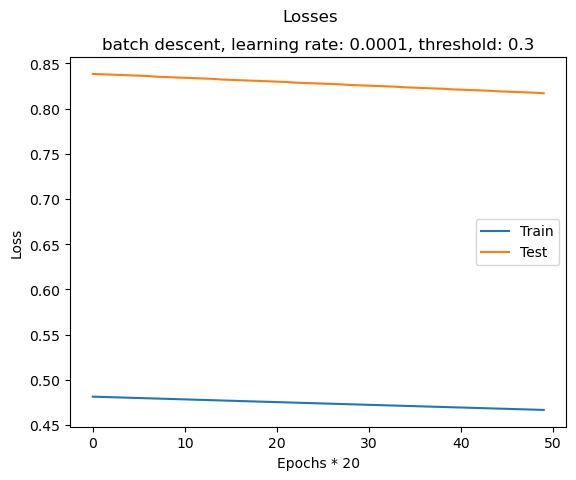

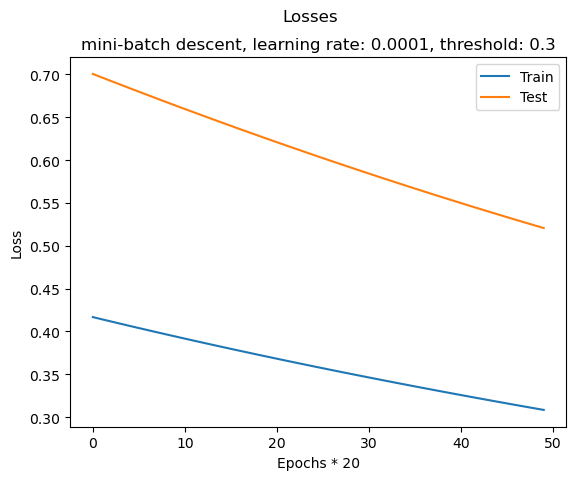

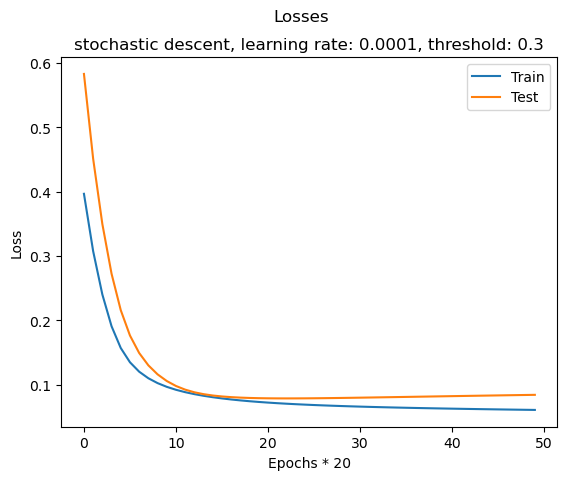

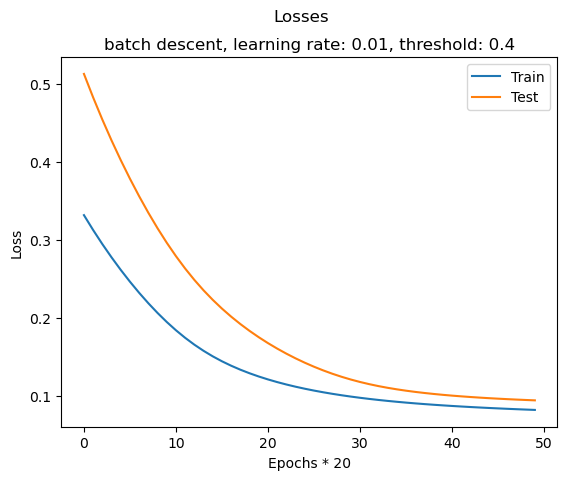

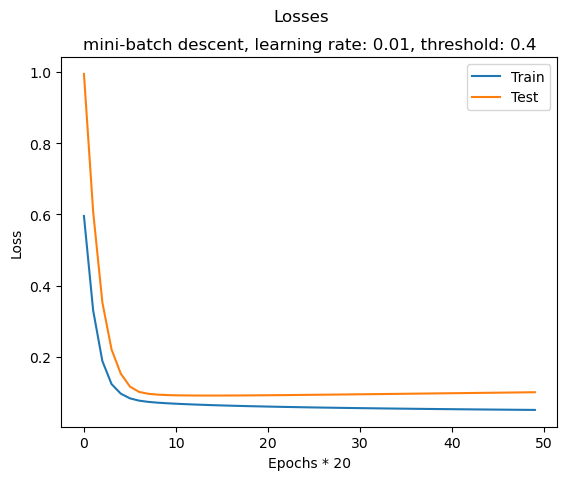

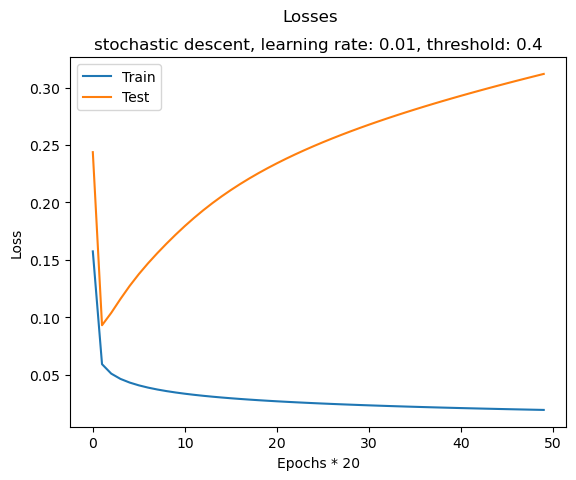

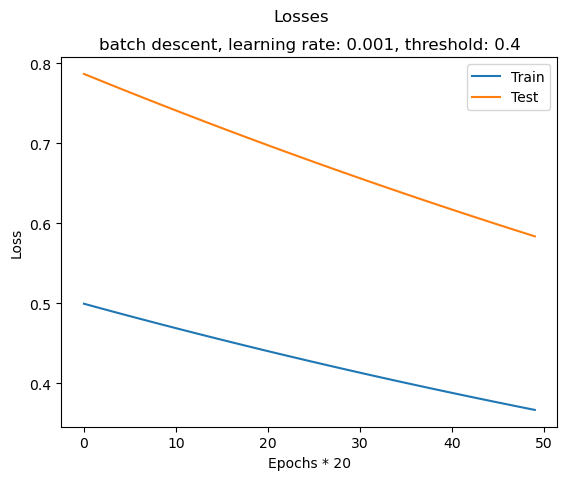

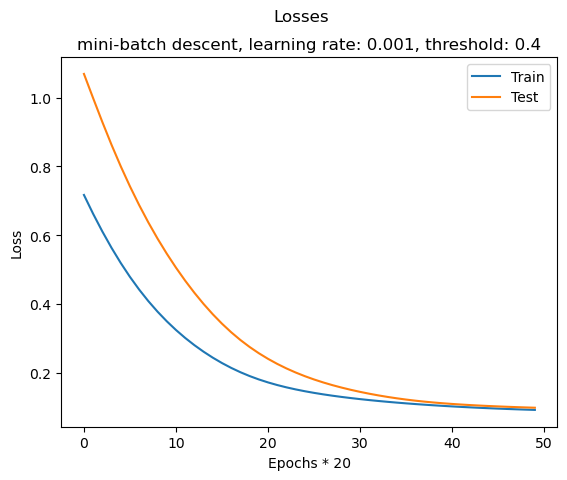

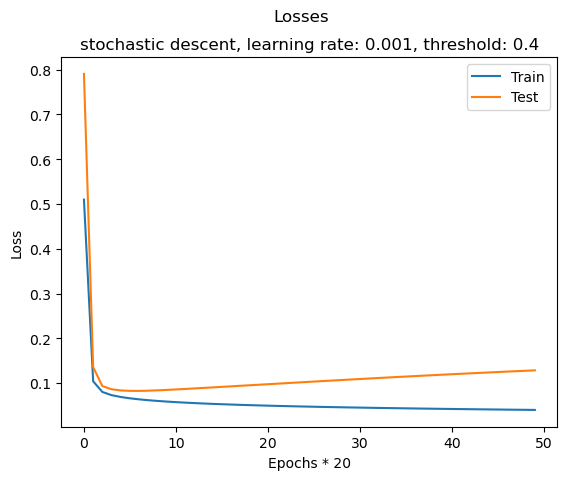

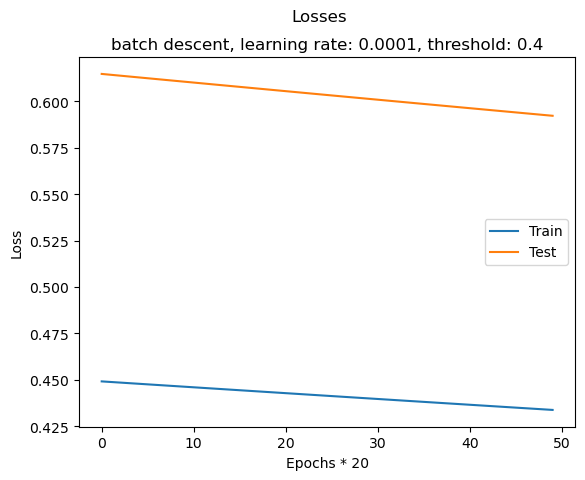

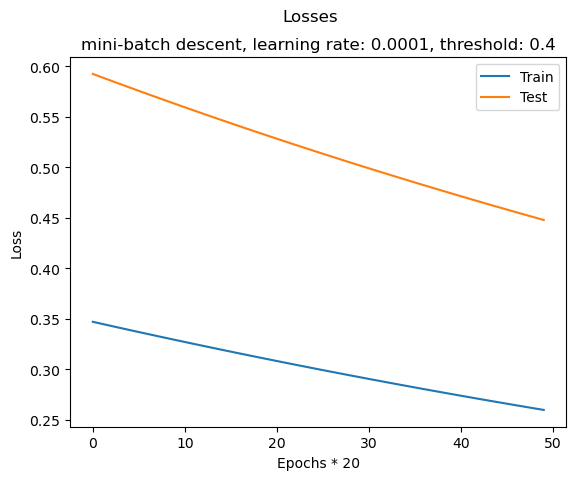

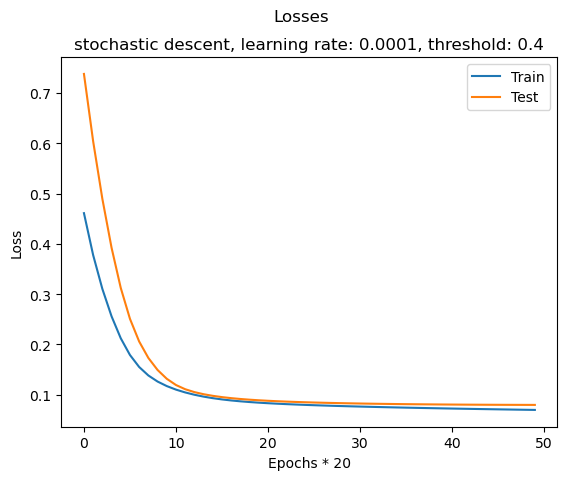

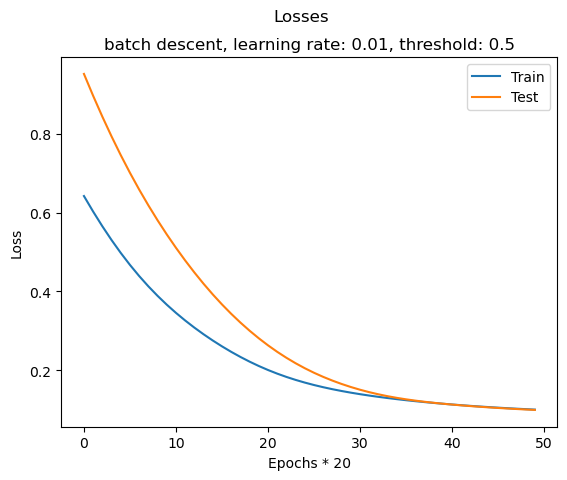

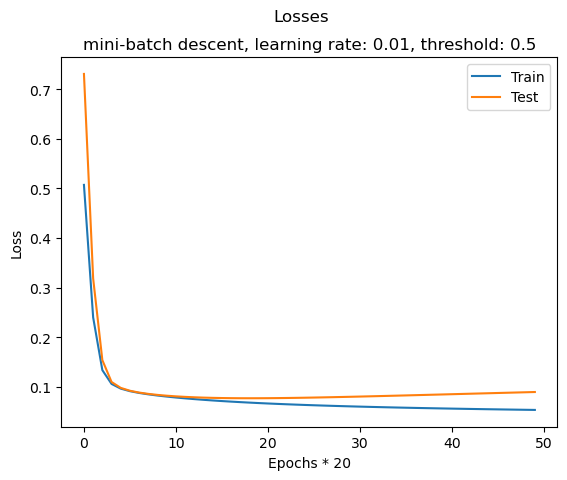

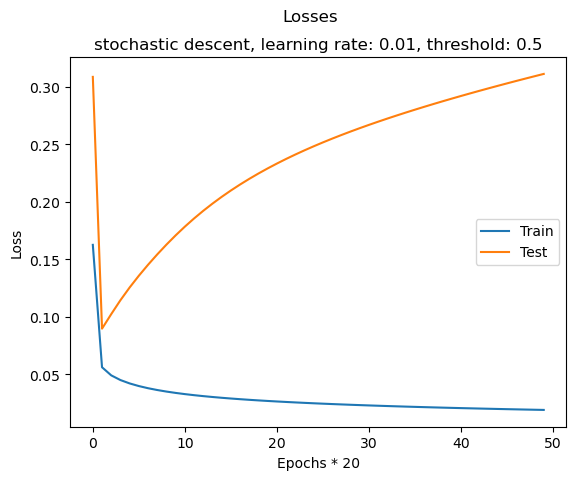

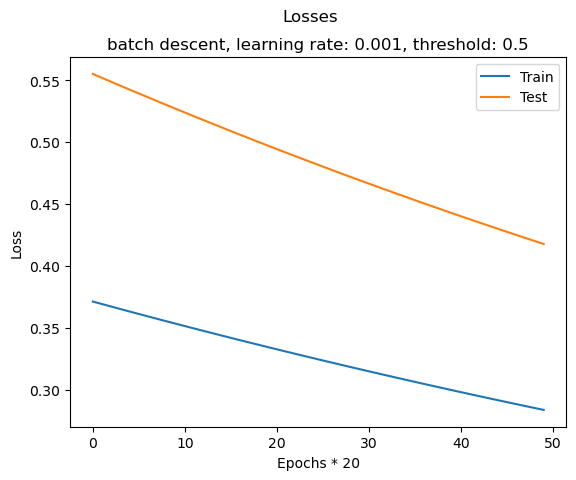

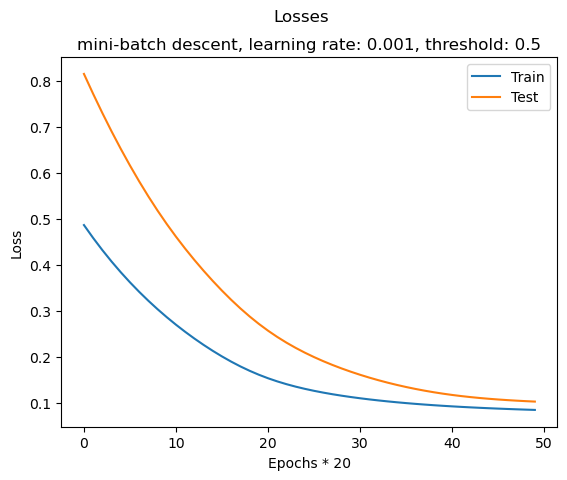

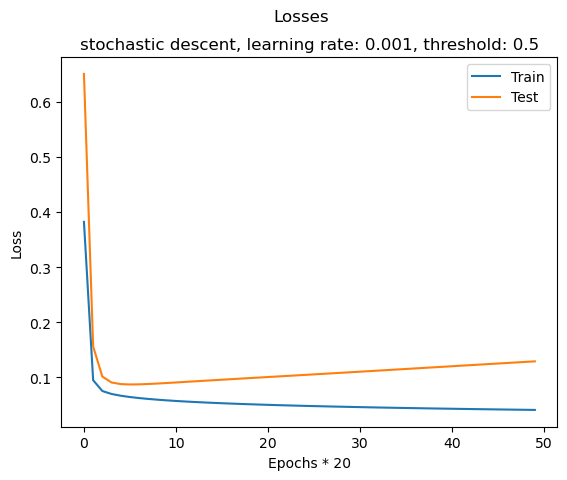

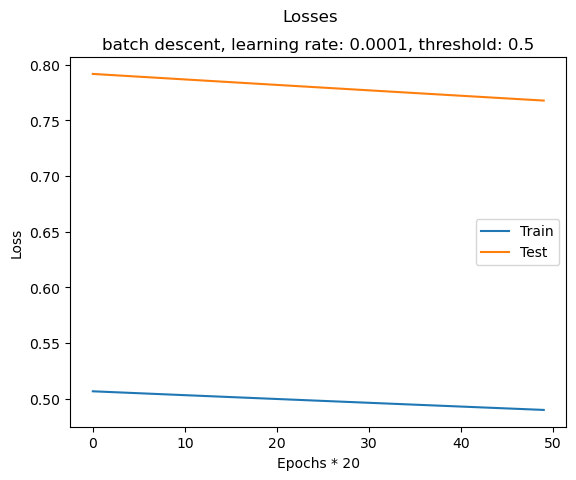

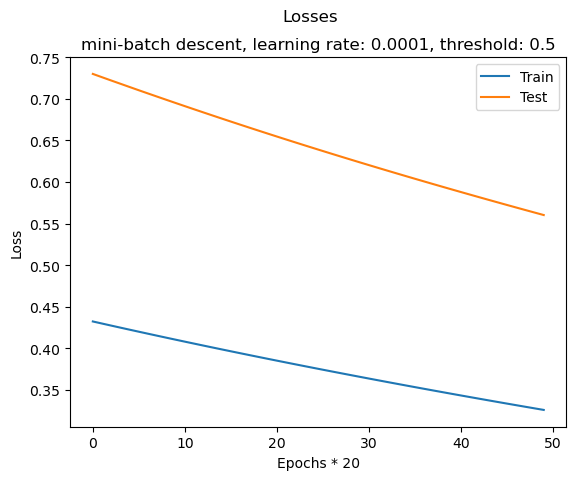

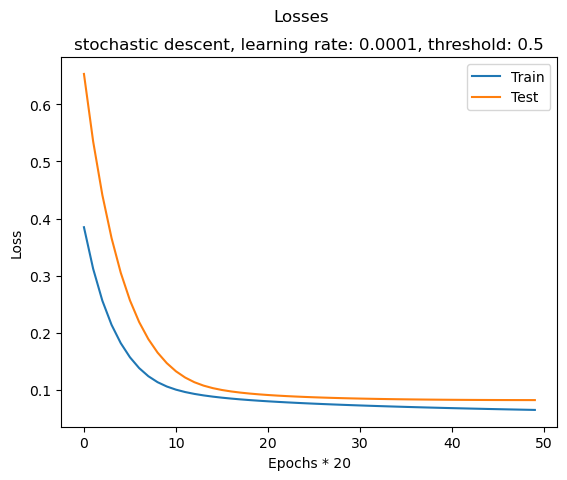

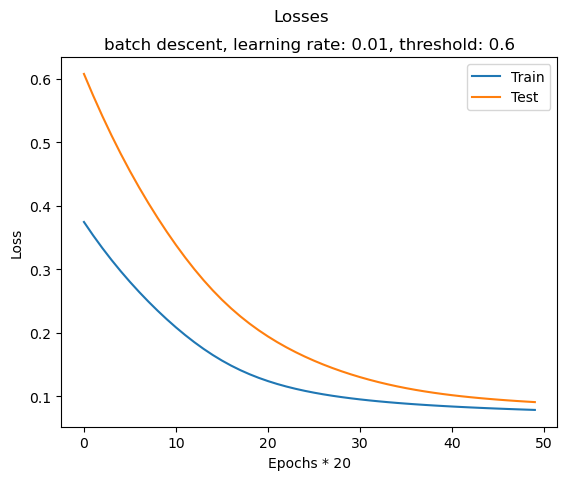

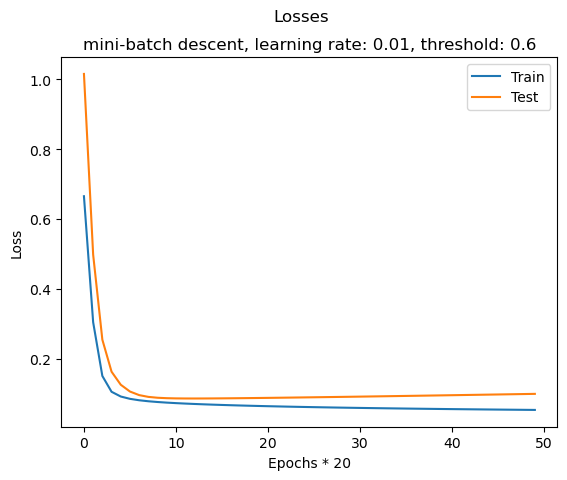

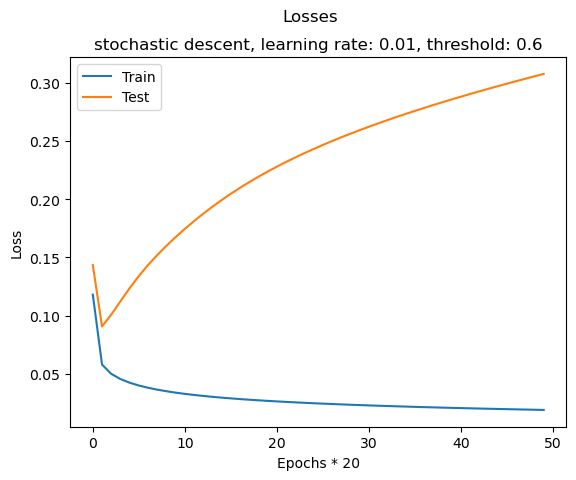

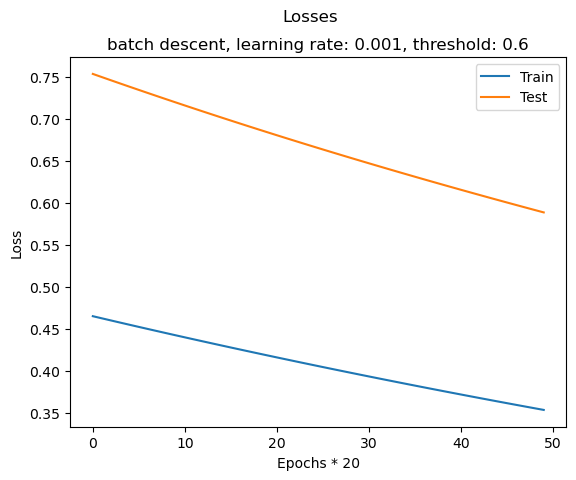

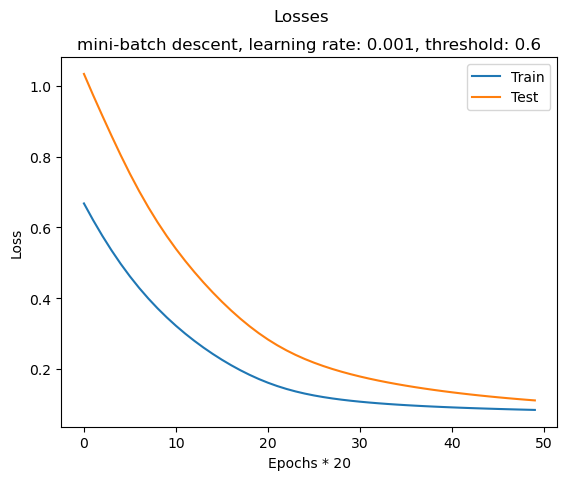

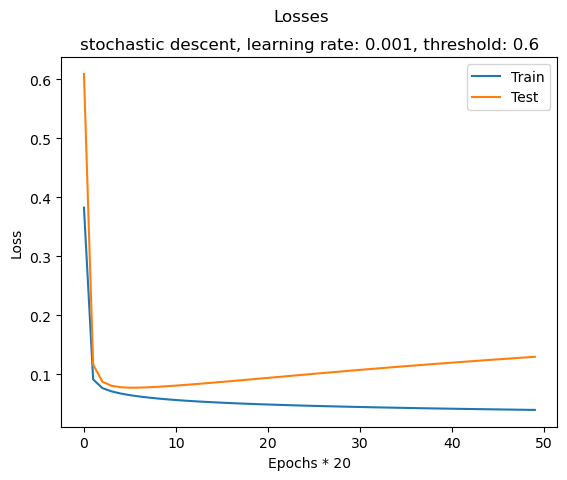

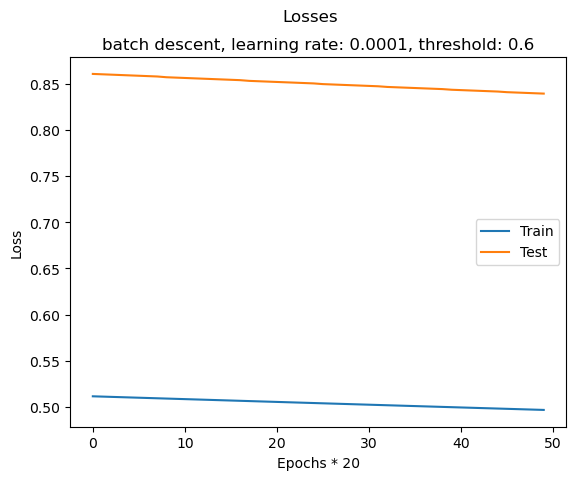

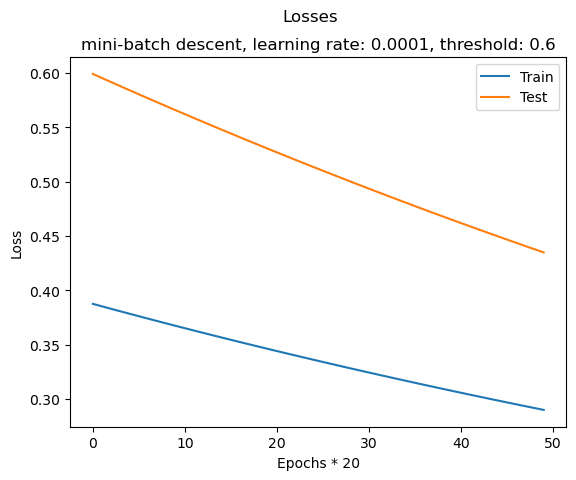

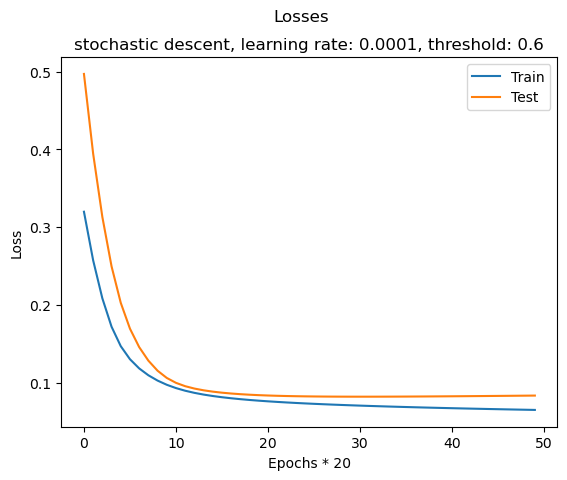

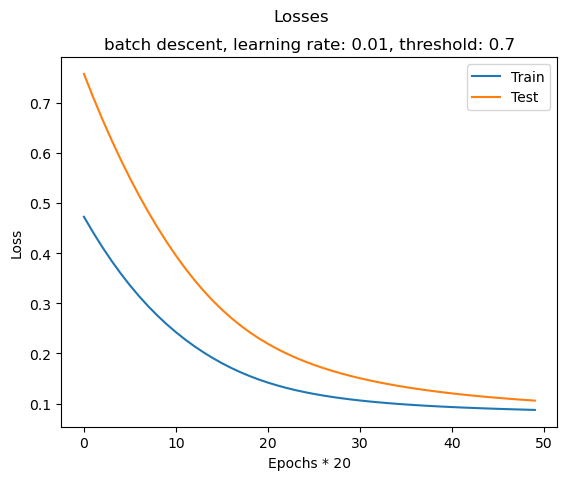

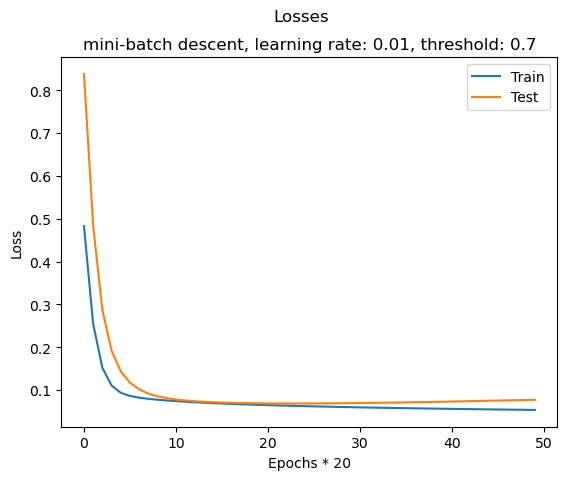

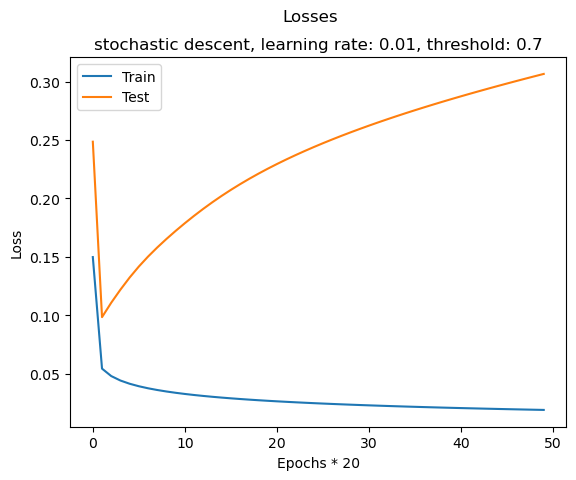

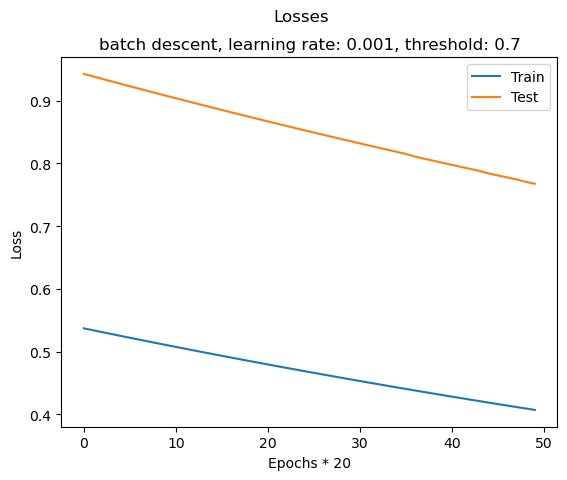

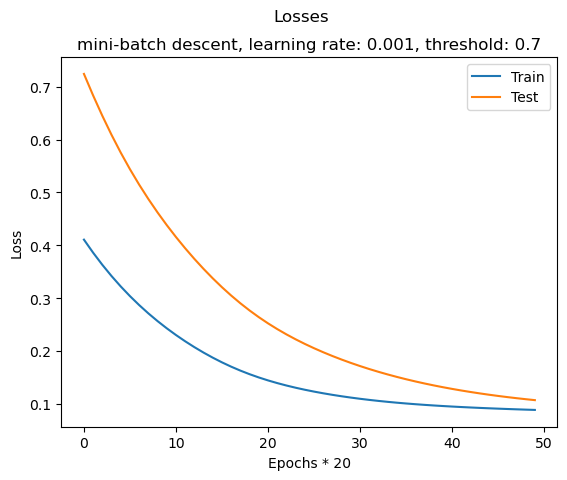

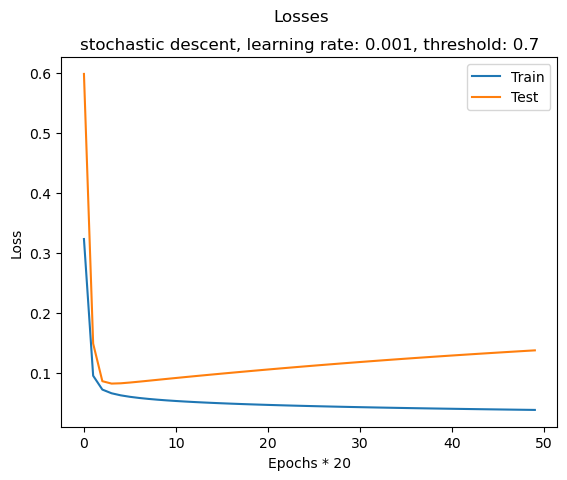

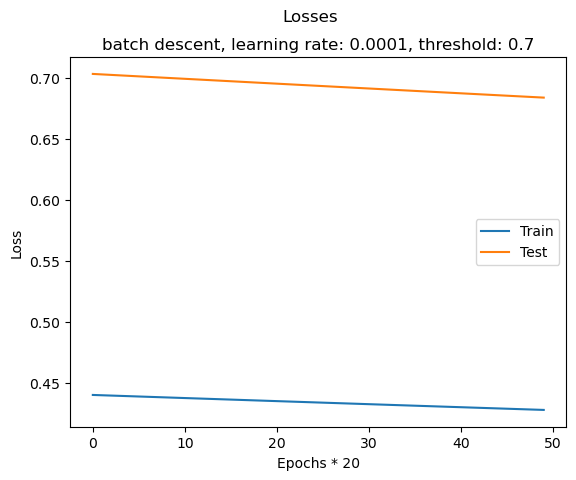

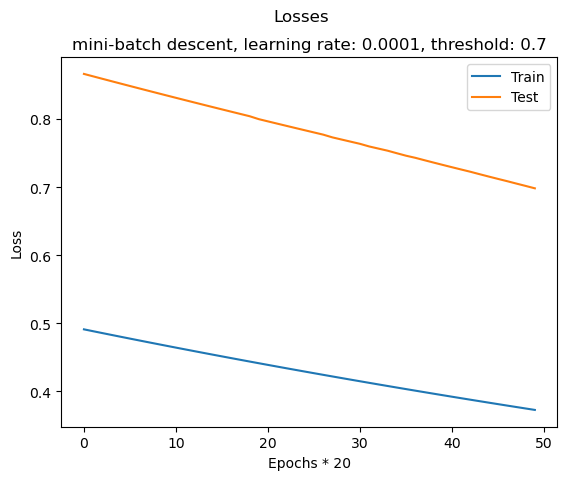

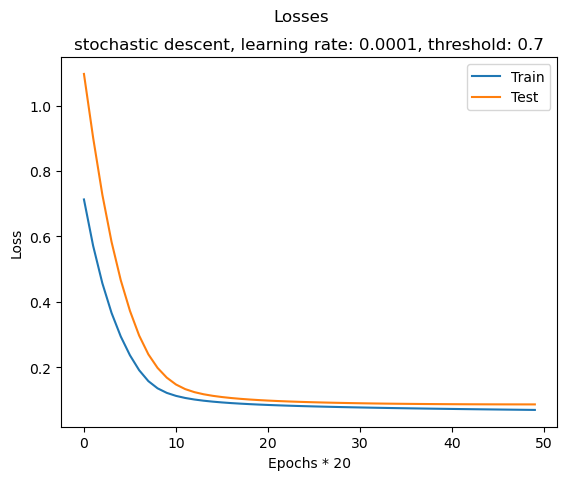

In [9]:
print("Learning Task2: Feature Engineering")
results_lr2 = results.copy()
for key in grid.keys():
    threshold, learning_rate, descent = key
    accuracies: list[float] = []
    for split in splits:
        train, test = split
        X_train, y_train = train.drop(columns=["diagnosis"]).to_numpy(dtype=np.float64), train["diagnosis"].to_numpy(dtype=np.float64)
        X_test, y_test = test.drop(columns=["diagnosis"]).to_numpy(dtype=np.float64), test["diagnosis"].to_numpy(dtype=np.float64)
        logreg_2 = LogReg(threshold=threshold)
        train_losses, test_losses = logreg_2.fit(X_train, y_train, X_test, y_test, lr = learning_rate, descent=descent, epochs=1000)
        y_pred = logreg_2.predict(X_test)
        tp, tn, fp, fn = logreg_2.score(X_test, y_test)
        accuracies.append((tp + tn) / (tp + tn + fp + fn))
    result_dict = {
        "threshold": threshold,
        "learning_rate": learning_rate,
        "descent": descent,
        "mean_accuracy": np.round((np.mean(accuracies)*100), 2),
        "std_accuracy": np.round((np.std(accuracies)*100), 2)
    }
    create_plot(train_losses, test_losses, f"{descent} descent, learning rate: {learning_rate}, threshold: {threshold}")
    result =  pd.DataFrame(result_dict, index=[0])
    results_lr2 = pd.concat([results_lr2, result], ignore_index=True)

In [10]:
results_lr2

,threshold,learning_rate,descent,mean_accuracy,std_accuracy
0,0.3,0.0100,batch,94.49,0.48
1,0.3,0.0100,mini-batch,97.22,0.47
2,0.3,0.0100,stochastic,93.79,0.56
3,0.3,0.0010,batch,85.71,1.53
4,0.3,0.0010,mini-batch,94.65,0.85
5,0.3,0.0010,stochastic,96.26,0.61
6,0.3,0.0001,batch,85.81,1.27
7,0.3,0.0001,mini-batch,87.27,1.80
8,0.3,0.0001,stochastic,96.36,0.84
9,0.4,0.0100,batch,94.14,1.30
